In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

In [3]:
df=pd.read_csv("C:/Users/Lenovo/Downloads/Employee.csv")

In [5]:
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [9]:
df.isnull()

,Company,Age,Salary,Place,Country,Gender
0,False,False,True,False,False,False
1,False,False,True,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
143,False,False,False,False,False,False
144,False,False,False,False,False,False
145,False,False,False,False,False,False
146,False,False,False,False,False,False


In [13]:
unique_values = {col: df[col].unique() for col in df.columns}
unique_counts = {col: len(df[col].unique()) for col in df.columns}


In [15]:
for col, values in unique_values.items():
    print(f"Column: {col}")
    print(f"Unique Values: {values}")
    print(f"Unique Count: {unique_counts[col]}")
    print("-" * 50)

Column: Company
Unique Values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Unique Count: 7
--------------------------------------------------
Column: Age
Unique Values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Unique Count: 30
--------------------------------------------------
Column: Salary
Unique Values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Unique Count: 41
--------------------------------------------------
Column: Place
Unique Values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Unique Count: 12
--------------------------------------------------
Column: Country
Unique Values: ['India

In [23]:
#statistical analysis
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [27]:
#renaming of column
df.rename(columns={'company': 'company_name'}, inplace=True)

In [29]:
df

,company_name,age,salary,place,country,gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [35]:
#checking for null values
df.isnull().sum()

company_name     8
age             18
salary          24
place           14
country          0
gender           0
dtype: int64

In [37]:
#replacing null value in age column with 'zero'
df['age'] = df['age'].replace(0, np.nan)


In [39]:
# Treat null values by replacing with mean/median/mode
def handle_missing_values(column):
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)

for col in df.columns:
    handle_missing_values(col)

display(df.isnull().sum())

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2768\394272017.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2768\394272017.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

company_name    0
age             0
salary          0
place           0
country         0
gender          0
dtype: int64

In [41]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [49]:
# Detect outliers using IQR (only for numerical columns)
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR)))
display(outliers.sum())


age        0
salary     0
gender    32
dtype: int64

In [51]:
# Detect outliers using IQR (only for numerical columns)
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR)))
display(outliers.sum())  # Count of outliers per numerical column


age        0
salary     0
gender    32
dtype: int64

In [57]:
# Detect outliers using IQR (only for numerical columns)
numeric_cols = df.select_dtypes(include=[np.number]).columns  # Select only numeric columns

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))
display(outliers.sum())  # Count of outliers per numerical column


age        0
salary     0
gender    32
dtype: int64

In [59]:
# Filter data where age > 40 and salary < 5000
filtered_df = df[(df['age'] > 40) & (df['salary'] < 5000)]
filtered_df

,company_name,age,salary,place,country,gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


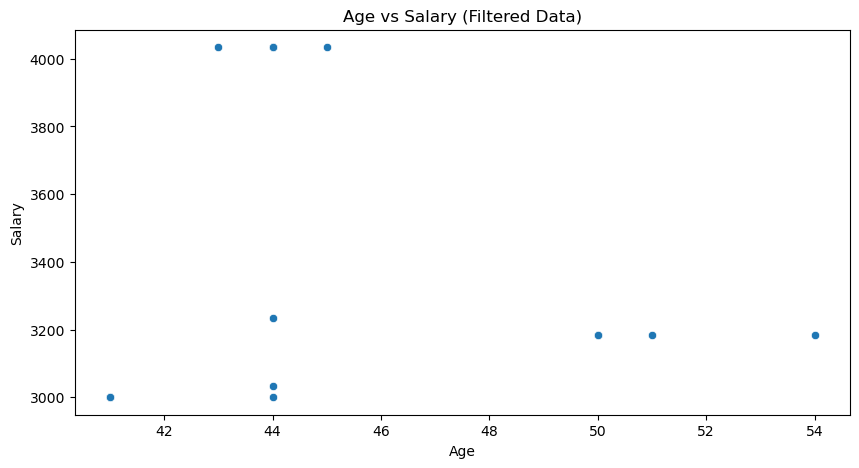

In [65]:
# Plot chart with age and salary
plt.figure(figsize=(10, 5))
sns.scatterplot(data=filtered_df, x='age', y='salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary (Filtered Data)')
plt.show()

In [69]:
# Count the number of people from each place
place_counts = df['place'].value_counts()
place_counts

place
Mumbai        48
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

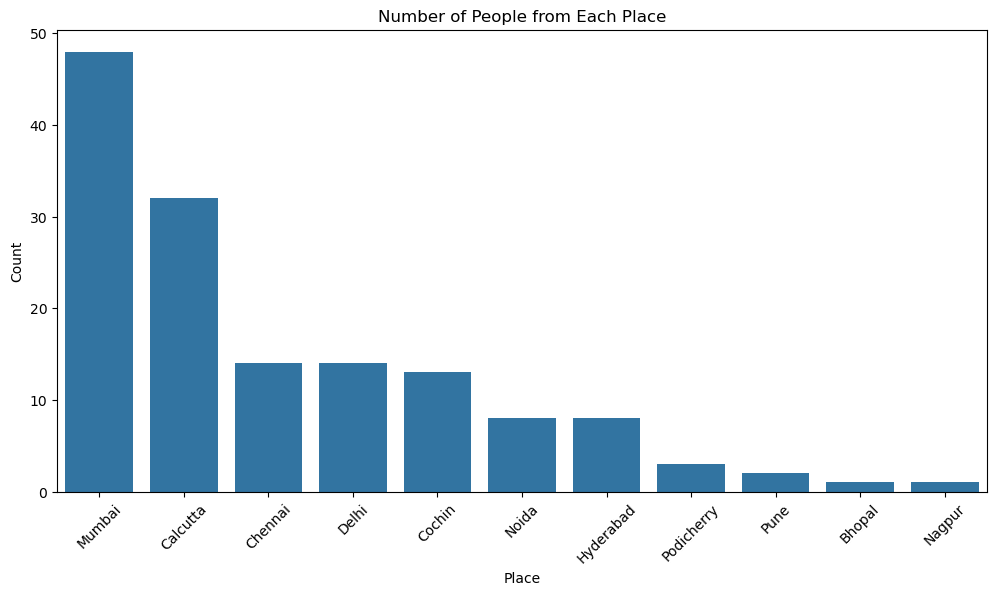

In [71]:
# Represent it visually
plt.figure(figsize=(12, 6))
sns.barplot(x=place_counts.index, y=place_counts.values)
plt.xlabel('Place')
plt.ylabel('Count')
plt.title('Number of People from Each Place')
plt.xticks(rotation=45)
plt.show()

In [75]:
# Convert categorical variables to numerical representations
categorical_cols = df.select_dtypes(include=['object']).columns

In [77]:
# Apply Label Encoding for binary categorical columns
label_enc = LabelEncoder()
for col in categorical_cols:
    if df[col].nunique() == 2:
        df[col] = label_enc.fit_transform(df[col])

In [79]:
# Apply One-Hot Encoding for multi-class categorical columns
df = pd.get_dummies(df, columns=[col for col in categorical_cols if df[col].nunique() > 2], drop_first=True)


In [81]:
df.head()

,age,salary,country,gender,company_name_Congnizant,company_name_Infosys,company_name_Infosys Pvt Lmt,company_name_TCS,company_name_Tata Consultancy Services,place_Calcutta,place_Chennai,place_Cochin,place_Delhi,place_Hyderabad,place_Mumbai,place_Nagpur,place_Noida,place_Podicherry,place_Pune
0,20.0,5000.0,India,0,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False
1,30.0,5000.0,India,0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
2,35.0,2300.0,India,0,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
3,40.0,3000.0,India,0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
4,23.0,4000.0,India,0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False


In [87]:
# Feature Scaling
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

numeric_cols = df.select_dtypes(include=[np.number]).columns

df_standard_scaled = df.copy()
df_minmax_scaled = df.copy()

df_standard_scaled[numeric_cols] = scaler_standard.fit_transform(df[numeric_cols])
df_minmax_scaled[numeric_cols] = scaler_minmax.fit_transform(df[numeric_cols])


In [91]:
df_standard_scaled.head()


,age,salary,country,gender,company_name_Congnizant,company_name_Infosys,company_name_Infosys Pvt Lmt,company_name_TCS,company_name_Tata Consultancy Services,place_Calcutta,place_Chennai,place_Cochin,place_Delhi,place_Hyderabad,place_Mumbai,place_Nagpur,place_Noida,place_Podicherry,place_Pune
0,-1.484676,-0.100827,India,-0.534522,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False
1,-0.267174,-0.100827,India,-0.534522,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
2,0.341577,-1.243735,India,-0.534522,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
3,0.950328,-0.947426,India,-0.534522,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
4,-1.119426,-0.524127,India,-0.534522,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False


In [93]:
df_minmax_scaled.head()

,age,salary,country,gender,company_name_Congnizant,company_name_Infosys,company_name_Infosys Pvt Lmt,company_name_TCS,company_name_Tata Consultancy Services,place_Calcutta,place_Chennai,place_Cochin,place_Delhi,place_Hyderabad,place_Mumbai,place_Nagpur,place_Noida,place_Podicherry,place_Pune
0,0.081081,0.445089,India,0.0,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False
1,0.351351,0.445089,India,0.0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
2,0.486486,0.137817,India,0.0,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
3,0.621622,0.217480,India,0.0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
4,0.162162,0.331285,India,0.0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
